# Face Mask Detector

#### Install Open CV

In [2]:
!pip install opencv-python==3.4.0.12

  Using cached https://files.pythonhosted.org/packages/d6/13/e80623e199d031da0182da2ba08b0fd9a573dfb74b1af37c87b64cfcf08c/opencv_python-3.4.0.12-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/96/84cf406fe7d589f3dba9fc0f737e65985a3526c6d8c783f02d4b5a10825d/numpy-1.16.6-cp27-cp27m-macosx_10_9_x86_64.whl
  Found existing installation: numpy 1.8.0rc1
Cannot uninstall 'numpy'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Import Dataset

This dataset was modified form of a dataset made by Prajna Bhandary. Retrieved from https://github.com/prajnasb/observations/tree/master/experiements/data. 

In [3]:
import os

#This is to help in running the model on a MAC system as if 
# this is not set to true the kernel would restart during training
os.environ['KMP_DUPLICATE_LIB_OK']='True'


base_dir = "data"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, 'validation')

#Directories with our training masks and without masks pictures
train_mask_dir = os.path.join(train_dir, 'with_mask')
train_no_mask_dir = os.path.join(train_dir, 'without_mask')

#Directories with our validation masks and without masks pictures
validation_mask_dir = os.path.join(validation_dir, 'with_mask')
validation_no_mask_dir = os.path.join(validation_dir, 'without_mask')


Now lets see if the total number of images in the train and validation directories.

In [4]:
train_mask_fnames = os.listdir(train_mask_dir)
train_no_mask_fnames = os.listdir(train_no_mask_dir)

print(train_mask_fnames[:10])
print(train_no_mask_fnames[:10])

validation_mask_fnames = os.listdir(validation_mask_dir)
validation_no_mask_fnames = os.listdir(validation_no_mask_dir)

['augmented_image_218.jpg', 'augmented_image_19.jpg', 'augmented_image_224.jpg', 'augmented_image_31.jpg', 'augmented_image_25.jpg', 'augmented_image_230.jpg', '419-with-mask.jpg', '330-with-mask.jpg', '260-with-mask.jpg', '327-with-mask.jpg']
['augmented_image_19.jpg', 'augmented_image_224.jpg', 'augmented_image_31.jpg', 'augmented_image_25.jpg', 'no mask side 2.jpg', 'augmented_image_230.jpg', '162.jpg', '176.jpg', '348.jpg', '360.jpg']


In [5]:
print("Total training mask images: ", len(train_mask_fnames))
print("Total training no mask images: ", len(train_no_mask_fnames))

print("Total validation mask images: ", len(validation_mask_fnames))
print("Total validation no mask images: ", len(validation_no_mask_fnames))

Total training mask images:  586
Total training no mask images:  585
Total validation mask images:  107
Total validation no mask images:  107


Now lets take a look at a few pictures to understand what the dataset is about. 

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#In our graph images would be outputed with a 4x4 dimensions
nrows = 4
ncolumns = 4

#Index for iterating over pictures
pic_index = 0


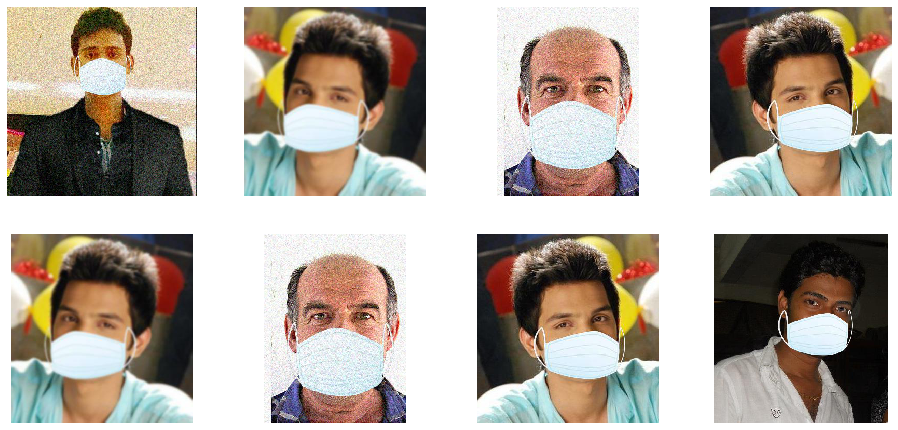

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncolumns*4, nrows * 4)

pic_index += 8
 
next_mask_image = [os.path.join(train_mask_dir, fname) 
                  for fname in train_mask_fnames[pic_index-8:pic_index -4]]

next_no_mask_image = [os.path.join(train_mask_dir, fname) 
                  for fname in train_no_mask_fnames[pic_index-8:pic_index -4]]

for i, img_path in enumerate(next_mask_image + next_no_mask_image):
    sp = plt.subplot(nrows, ncolumns, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

### Building the model

Here we build a convolutional neural network with 3 convolutions.

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    #Build five convolutions
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics= ['accuracy'])

### Data Preprocessing 

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150)
)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size = (150,150)
)

Found 1169 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


### Training

In [12]:


history = model.fit_generator(train_generator, 
                    validation_data=validation_generator,
                    steps_per_epoch = 20,
                    epochs = 15,
                    validation_steps = 10,
                    verbose = 1
)

Epoch 1/15
20/20 [==============================] - 15s 725ms/step - loss: 1.2944 - accuracy: 0.6967 - val_loss: 0.1729 - val_accuracy: 0.9650
Epoch 2/15
20/20 [==============================] - 15s 741ms/step - loss: 0.3359 - accuracy: 0.9050 - val_loss: 0.1059 - val_accuracy: 0.9600
Epoch 3/15
20/20 [==============================] - 15s 771ms/step - loss: 0.2213 - accuracy: 0.9275 - val_loss: 0.0911 - val_accuracy: 0.9700
Epoch 4/15
20/20 [==============================] - 15s 772ms/step - loss: 0.1222 - accuracy: 0.9625 - val_loss: 0.0707 - val_accuracy: 0.9700
Epoch 5/15
20/20 [==============================] - 15s 750ms/step - loss: 0.2308 - accuracy: 0.9332 - val_loss: 0.0592 - val_accuracy: 0.9850
Epoch 6/15
20/20 [==============================] - 15s 761ms/step - loss: 0.0966 - accuracy: 0.9650 - val_loss: 0.0511 - val_accuracy: 0.9850
Epoch 7/15
20/20 [==============================] - 15s 758ms/step - loss: 0.0920 - accuracy: 0.9750 - val_loss: 0.0650 - val_accuracy: 0.9850

### Visualizing Intermediate Representations

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


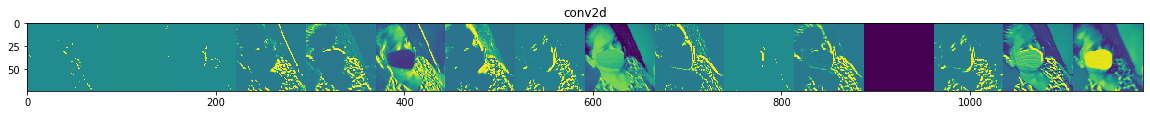

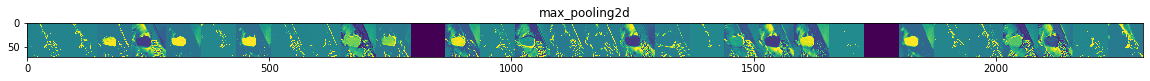

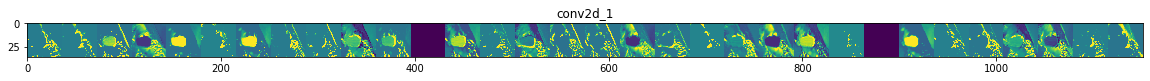

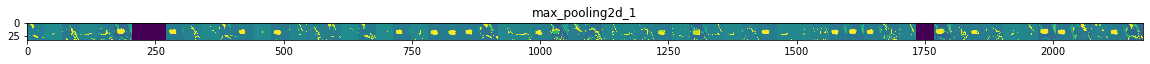

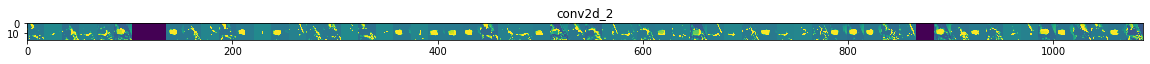

In [13]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
mask_img_files = [os.path.join(train_mask_dir, f) for f in train_mask_fnames]
no_mask_img_files = [os.path.join(train_no_mask_dir, f) for f in train_no_mask_fnames]

img_path = random.choice(mask_img_files + no_mask_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### Running the model

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

for fn in filenames:
 
  
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
    
  # predicting images
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is not wearing a mask")
    
  else:
    print(fn + " is wearing a mask")
    


[0.]
/Users/ybotwe/Desktop/Personal/Data Science Projects/Face mask detector/data/validation/with_mask/mask_py.jpg is wearing a mask


Press enter to take picture.


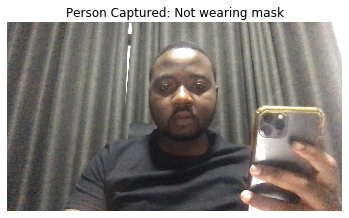

In [18]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)
if not (cap.isOpened()):
    print("Video device unconnected.")
arb = input('Press enter to take picture.')
ret, frame = cap.read()
cap.release()
cv2.destroyAllWindows()
cv2_im = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(cv2_im)
plt.axis('Off')

#preprocessing of image captured
pil_image = Image.fromarray(cv2_im)
width = 150
height = 150
pil_image = pil_image.resize((width,height), Image.ANTIALIAS)
image = np.expand_dims(pil_image, axis=0)
image = tf.cast(image, tf.float32)
cv2_im_new = np.array(image)

#predict using the model
classes = model.predict(cv2_im_new)

if classes[0]>0:
    classification = "Not wearing mask"
    
else:
    classification = "Wearing mask"

#show answer as title
plt.title('Person Captured: '+ classification)
plt.show()



### PLOT LOSS AND ACCURACY

Text(0.5, 1.0, 'Training and validation loss')

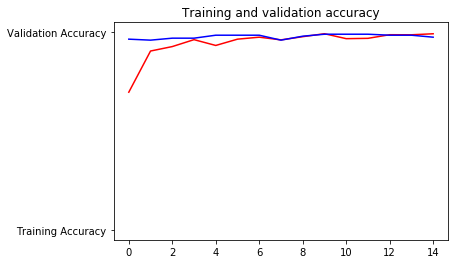

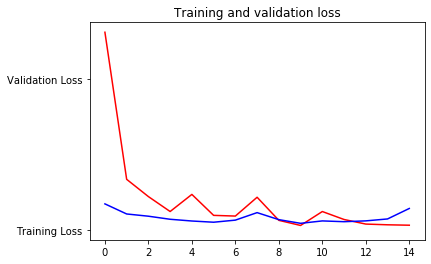

In [15]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)